In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

# Beautiful format for float type
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set()

In [26]:
acc_x_card = pd.read_csv('tj_02_acc_x_card.csv')
account = pd.read_csv('tj_02_account_transaction.csv')
creditcard = pd.read_csv('tj_02_creditcard_transaction.csv')
data_train = pd.read_csv('tj_02_training.csv', names=['account_no', 'is_merchant'])
data_test = pd.read_csv('tj_02_test.csv', header=None)

In [78]:
acc_x_card.head(5)
account.head(500)
creditcard.head(5)

# data_train.sample(5)
# data_test.sample(5)

,account_no,card_no
0,3450028461,1234000000026194.000
1,3450033777,1234000000010556.000
2,3450003701,1234000000027765.000
3,3450038496,1234000000013169.000
4,3450035935,1234000000009252.000


,account_no,from_to_account_no,txn_amount,txn_dt,txn_hour,txn_type,weekday
0,3450045224,0,50,2016-04-03,17,DR,6
1,3450034734,0,10000,2016-10-07,13,DR,4
2,3450019126,3450594449,800,2016-10-03,18,CR,0
3,3450028971,3450596508,8650,2016-10-03,21,DR,0
4,3450000833,0,10000,2016-06-22,22,DR,2
5,3450002147,3451146090,400,2016-03-29,18,CR,1
6,3450048667,3450221442,200,2016-08-26,22,CR,4
7,3450034705,3450397046,1850,2016-09-07,11,CR,2
8,3450023752,0,50,2016-09-30,17,DR,4
9,3450001395,0,450,2016-07-14,11,CR,3


,card_no,txn_date,txn_hour,txn_amount,mer_cat_code,mer_id
0,1234000000009154,2016-12-07 00:00:00.0,22,1550,4511,0
1,1234000000017165,2016-12-07 00:00:00.0,22,250,6011,0
2,1234000000000768,2016-12-07 00:00:00.0,22,250,8398,0
3,1234000000018716,2016-12-07 00:00:00.0,22,50,5735,0
4,1234000000010162,2016-12-07 00:00:00.0,22,200,4121,0


In [51]:
# acc_x_card.info()
account.info()
# creditcard.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012569 entries, 0 to 2012568
Data columns (total 6 columns):
account_no            int64
from_to_account_no    int64
txn_amount            int64
txn_dt                object
txn_hour              int64
txn_type              object
dtypes: int64(4), object(2)
memory usage: 92.1+ MB


In [29]:
acc_x_card.describe()
account.describe()
creditcard.describe()

,account_no,card_no
count,11652.000,7593.000
mean,3450024703.405,1234000000006933.000
std,14573.065,4749.445
min,3450000010.000,1234000000000001.000
25%,3450013574.250,1234000000003221.000
50%,3450025610.000,1234000000006569.000
75%,3450036397.750,1234000000009936.000
max,3450049920.000,1234000000028162.000


,account_no,from_to_account_no,txn_amount,txn_hour
count,2012569.000,2012569.000,2012569.000,2012569.000
mean,3450027748.485,1999750918.282,5045.252,14.002
std,14890.648,1703334166.138,32008.023,4.856
min,3450000010.000,0.000,50.000,0.000
25%,3450015767.000,0.000,200.000,11.000
50%,3450030416.000,3450166354.000,550.000,14.000
75%,3450040550.000,3450697787.000,2500.000,18.000
max,3450049920.000,3451195503.000,9866600.000,23.000


,card_no,txn_hour,txn_amount,mer_cat_code,mer_id
count,493350.000,493350.000,493350.000,493350.000,493350.000
mean,1234000000007427.250,14.452,1809.580,5821.998,6813.484
std,5339.475,4.715,32001.994,895.175,10465.269
min,1234000000000001.000,0.000,50.000,742.000,0.000
25%,1234000000003351.000,11.000,250.000,5411.000,0.000
50%,1234000000006881.000,15.000,500.000,5631.000,0.000
75%,1234000000010409.000,18.000,1050.000,6011.000,12119.000
max,1234000000028162.000,23.000,19201000.000,9405.000,28726.000


In [30]:
data_train.head()

,account_no,is_merchant
0,3450023212,1
1,3450001274,0
2,3450033744,0
3,3450030139,0
4,3450016925,0


In [31]:
df = data_train
df.join(acc_x_card.set_index('account_no'), on='account_no')
df.fillna('0')

,account_no,is_merchant,card_no
0,3450023212,1,nan
1,3450001274,0,nan
2,3450033744,0,1234000000002700.000
3,3450030139,0,nan
4,3450016925,0,1234000000004377.000
5,3450009134,1,1234000000002211.000
6,3450009099,1,nan
7,3450043413,0,1234000000009056.000
8,3450045456,0,1234000000004387.000
9,3450002261,0,nan


,account_no,is_merchant
0,3450023212,1
1,3450001274,0
2,3450033744,0
3,3450030139,0
4,3450016925,0
5,3450009134,1
6,3450009099,1
7,3450043413,0
8,3450045456,0
9,3450002261,0


In [ ]:
counts = data_train.groupby(['is_merchant']).count()
counts.head()
counts.plot(kind='bar')

axc = acc_x_card.groupby(['card_no']).count()
axc.describe()

account.boxplot(column='account_no', by = 'txn_type')

account['txn_type'].value_counts()

In [58]:
len(account.account_no.unique())
len(account.from_to_account_no.unique())

16560

474577

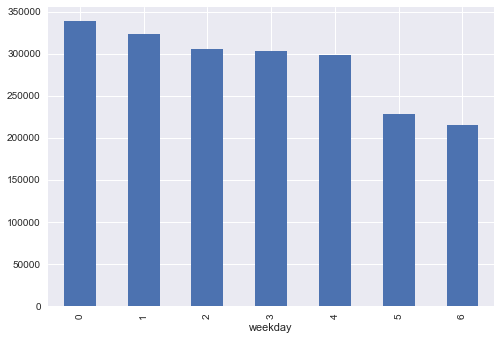

In [66]:
account['weekday'] = pd.to_datetime(account['txn_dt']).dt.dayofweek
# account.head()
account['weekday'].groupby(account["weekday"]).count().plot(kind="bar")

In [79]:
mcc_codes = pd.read_csv('mcc_codes.csv')
creditcard.join(mcc_codes[['mcc', 'irs_description']].set_index('mcc'), on='mer_cat_code')
creditcard.shape

,card_no,txn_date,txn_hour,txn_amount,mer_cat_code,mer_id,irs_description
0,1234000000009154,2016-12-07 00:00:00.0,22,1550,4511,0,"Airlines, Air Carriers"
1,1234000000017165,2016-12-07 00:00:00.0,22,250,6011,0,Automated Cash Disburse
2,1234000000000768,2016-12-07 00:00:00.0,22,250,8398,0,Charitable and Social Service Organizations - ...
3,1234000000018716,2016-12-07 00:00:00.0,22,50,5735,0,Record Stores
4,1234000000010162,2016-12-07 00:00:00.0,22,200,4121,0,Taxicabs/Limousines
5,1234000000007516,2016-12-07 00:00:00.0,22,1350,7297,0,Massage Parlors
6,1234000000010162,2016-12-07 00:00:00.0,22,200,4121,0,Taxicabs/Limousines
7,1234000000010162,2016-12-07 00:00:00.0,22,200,4121,0,Taxicabs/Limousines
8,1234000000004011,2016-12-07 00:00:00.0,22,650,5331,0,Variety Stores
9,1234000000007516,2016-12-07 00:00:00.0,22,200,8398,0,Charitable and Social Service Organizations - ...


(493350, 6)

493350